# Unsupervised Learning
By: Bethany Bailey
## Part 1 - PCA

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("College.csv")

df.dropna()
df = df.drop('Private', axis=1)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [3]:
pca = PCA().fit(scale(df))

cols = [f'C{i}' for i in range(1, len(df.columns)+1)]
pca_loadings = pd.DataFrame(pca.components_.T, df.columns, cols)

pca_loadings

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


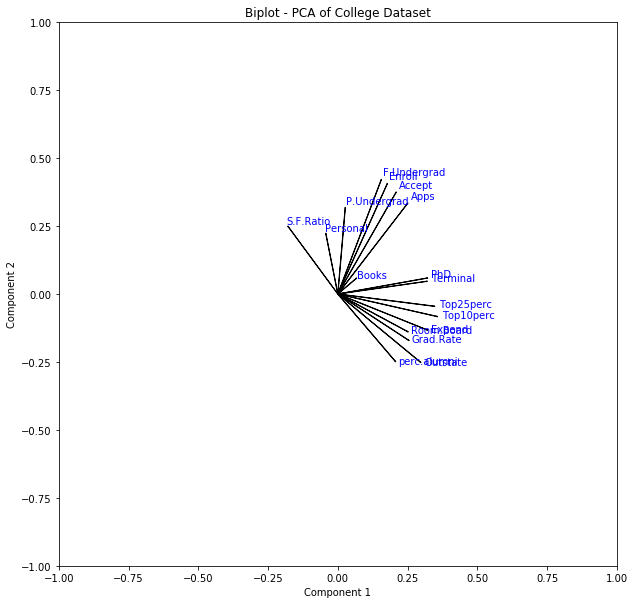

In [4]:
%matplotlib inline

fig , plot = plt.subplots(figsize=(10,10))
    
plt.title('Biplot - PCA of College Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plot.set_xlim(-1, 1)
plot.set_ylim(-1, 1)

# Plot each vector and label them.
for i in range(len(df.columns)):
    plot.arrow(0,0, pca_loadings['C1'][i], pca_loadings['C2'][i])
    plot.text(pca_loadings['C1'][i]*1.05, pca_loadings['C2'][i]*1.05, pca_loadings['C1'].index[i], color='blue')

The below variables appear strongly correlated (above .3) on the first principal component:
- Top10Perc
- Top25Perc
- Expend
- PhD
- Terminal

This variable seems to be related to the ranking/level of school, since it has high rankings of students, student expenditures, and faculty degrees.

The below variables appear strongly correlated (above .3) on the second principal component:
- F.Undergrad
- Enroll
- Accept
- Apps
- P.Undergrad

This variable seems to be related to undergraduate enrollment and application.

I did this analysis using normalized data. Initially I completed this with unnormalized data. The results I got with unnormalized data are below:

First component: 
- F.Undergrad
- Apps
- Accept
- Expend

This variable seems related to enrollment.

Second component:
- Expend
- Outstate
- F.Undergrad

It is not as clear to what this variable is related. It may be related to cost of schooling.

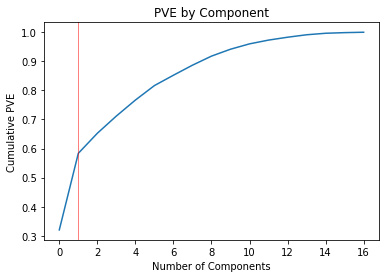

In [5]:
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
    
ax = figure().gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative PVE')
plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
plt.title('PVE by Component')
show()

In [6]:
np.cumsum(pca.explained_variance_ratio_)[1]

0.58360842634981669

Approximately 58.4% of the variance in College is explained by the first two principal components. Once again, this information uses normalized data. Using unnormalized data, the percentage variance explained is approximately 87%.

## Part 2 - Clustering
### Clustering - Part 1

In [7]:
df2 = pd.read_csv("USArrests.csv", index_col=0)

df2.dropna()
df2.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
scaled_df = StandardScaler().fit_transform(df2.values)

pca2 = PCA(2).fit(scaled_df).transform(scaled_df)
pca2_X = pd.DataFrame(pca2, index = df2.index, columns=["C1", "C2"])
pca2_X.head()

,C1,C2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


In [29]:
load_pca = PCA().fit(scale(df2))
cols = [f'C{i}' for i in range(1, len(df2.columns)+1)]
pca_loadings2 = pd.DataFrame(load_pca.components_.T, df2.columns, cols)
pca_loadings2

,C1,C2,C3,C4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


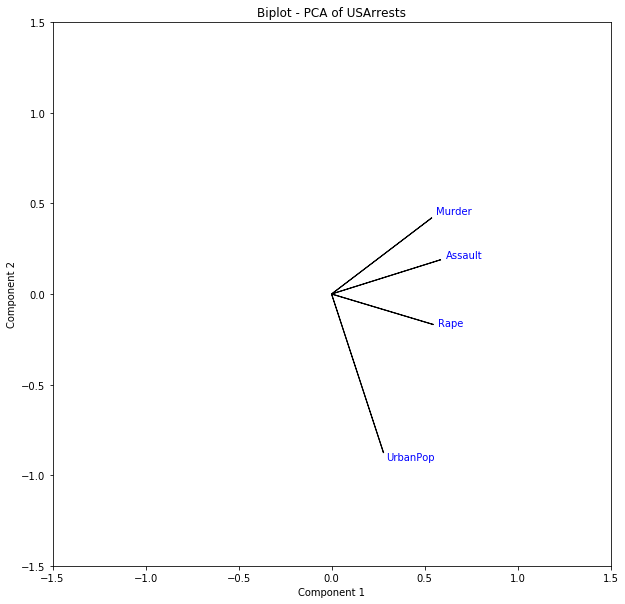

In [12]:
fig , plot = plt.subplots(figsize=(10,10))
    
plt.title('Biplot - PCA of USArrests')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plot.set_xlim(-1.5, 1.5)
plot.set_ylim(-1.5, 1.5)

# Plot each vector and label them.
for i in range(len(df2.columns)):
    plot.arrow(0,0, pca_loadings2['C1'][i], pca_loadings2['C2'][i])
    plot.text(pca_loadings2['C1'][i]*1.05, pca_loadings2['C2'][i]*1.05, pca_loadings2['C1'].index[i],\
              color='blue')

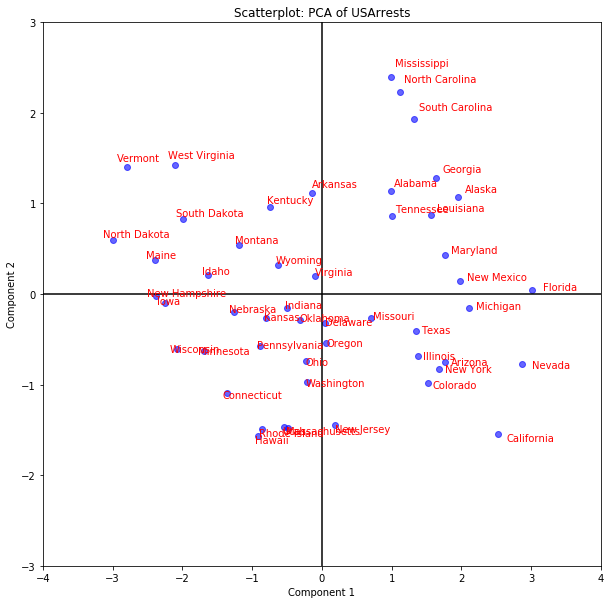

In [14]:
plt.figure(figsize = (10, 10))
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.hlines(0, -4, 4, linestyles='-', colors='black')
plt.vlines(0, -3, 3, linestyles='-', colors='black')
plt.scatter(pca2_X['C1'], pca2_X['C2'], color = "blue", alpha=.6, lw=1)
plt.title('Scatterplot: PCA of USArrests')
plt.xlabel('Component 1')
plt.ylabel('Component 2') 

for i in range(len(pca2_X)):
    plt.text(pca2_X['C1'][i]*1.05, pca2_X['C2'][i]*1.05, \
              pca2_X['C1'].index[i], color='red')

### Clustering - Parts 2-5

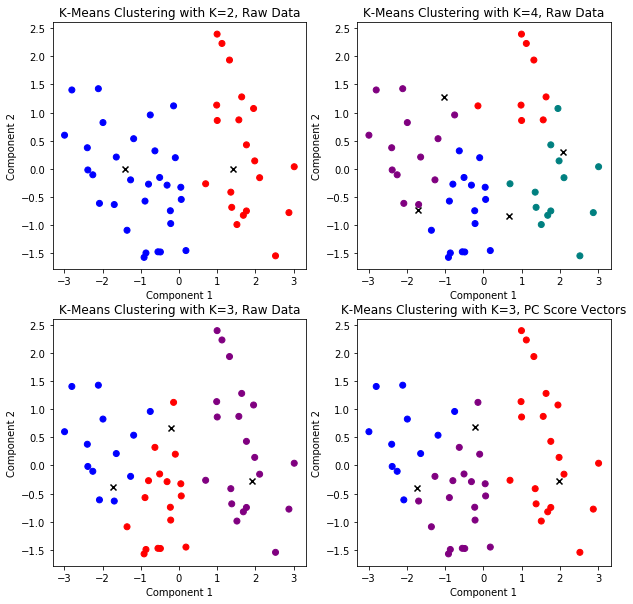

In [39]:
pca = PCA()
def plot_kmeans(df, ax, n_clusters, n_init, title, colormap):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init).fit(df)
    clusters = kmeans.labels_
    plt.figure(figsize=(10,10))
    ax.scatter(pca2_X['C1'], pca2_X['C2'], c = colormap[clusters])
    centers = kmeans.cluster_centers_
    pca_centers = pca.fit_transform(centers)
    ax.scatter(x = pca_centers[:, 0], y = pca_centers[:, 1], marker = 'x', c = 'black')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

%matplotlib inline

figure, axes = plt.subplots(2, 2, figsize = (10,10))
    
plot_kmeans(scale(df2), axes[0,0], n_clusters=2, n_init=20, title="K-Means Clustering with K=2, Raw Data",\
           colormap = np.array(['red', 'blue']))
plot_kmeans(scale(df2), axes[0,1], n_clusters=4, n_init=20, title="K-Means Clustering with K=4, Raw Data",\
           colormap = np.array(['red', 'blue', 'purple', 'teal']))
plot_kmeans(scale(df2), axes[1,0], n_clusters=3, n_init=20, title="K-Means Clustering with K=3, Raw Data",\
           colormap = np.array(['red', 'blue', 'purple']))
plot_kmeans(pca2_X, axes[1,1], n_clusters=3, n_init=20, title="K-Means Clustering with K=3, PC Score Vectors", \
            colormap = np.array(['red', 'blue', 'purple']))
plt.show()

Overall, these clusters vary more along component one than component 2 (up to K=4). This implies that they do not vary as much along component 2, which seemed to be correlated to urban population. Thus, these states must be clustered more on crime rate (component 1 is correlated more to overall crime rate) than urban population.
Up to four clusters still provides us with valuable information from this data, although the fourth cluster (in the upper right corner) is getting a little small). The clustering results stay close to the same when using the score vectors with K=3 clustering compared to using the raw data.
### Clustering - Part 6

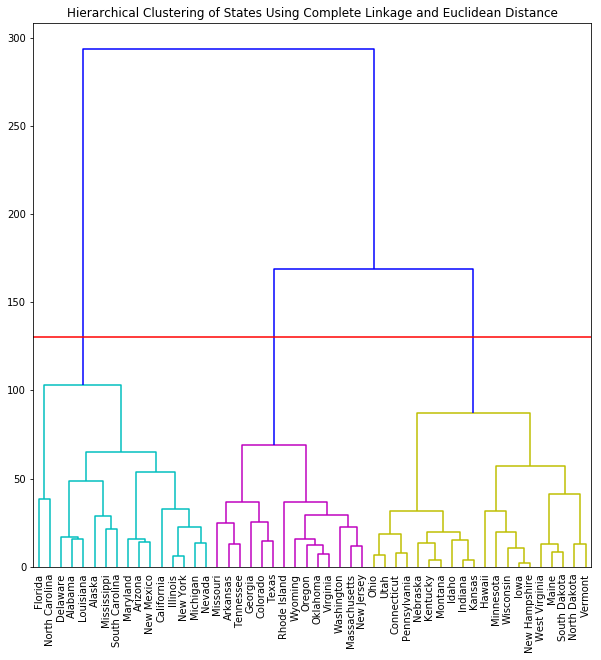

In [16]:
cluster = hr.linkage(df2, method='complete', metric='euclidean')
plt.figure(figsize = (10, 10))
hr.set_link_color_palette(['c', 'm', 'y', 'k'])
hr.dendrogram(cluster, labels=df2.index, color_threshold=110, leaf_font_size = 10)
plt.title('Hierarchical Clustering of States Using Complete Linkage and Euclidean Distance')
plt.axhline(130, color='r')
plt.show()

### Clustering - Part 7

Cluster 1: Florida, North Carolina, Delaware, Alabama, Louisiana, Alaska, Mississippi, South Carolina, Maryland, Arizona, New Mexico, California, Illinois, New York, Michigan, Nevada.

Cluster 2: Missouri, Arkansas, Tennessee, Georgia, Colorado, Texas, Rhode Island, Wyoming, Oregon, Oklahoma, Virginia, Washington, Massachusetts, New Jersey.

Cluster 3: Ohio, Utah, Connecticut, Pennsylvania, Nebraska, Kentucky, Montana, Idaho, Indiana, Kansas, Hawaii, Minnesota, Wisconsi, Iowa, New Hampshire, West Virginia, Maine, South Dakota, North Dakota, Vermont.

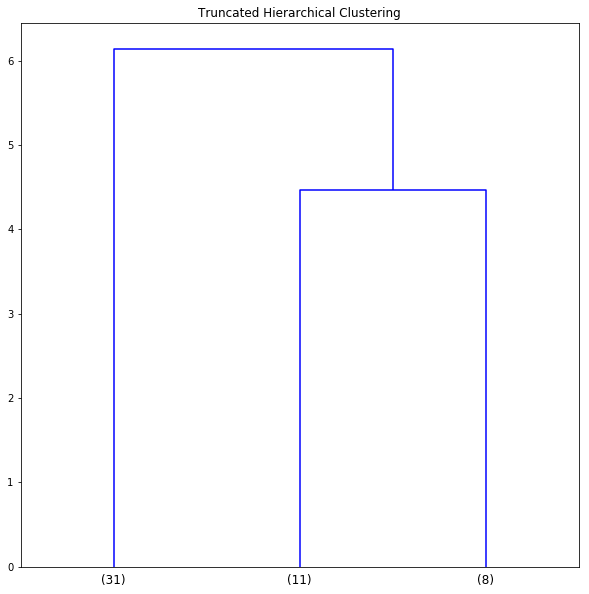

In [40]:
plt.figure(figsize = (10,10))
hr.dendrogram(cluster, labels=df2.index, truncate_mode='lastp', p=3)
plt.title('Truncated Hierarchical Clustering')
plt.axhline(130, color='r')
plt.show()

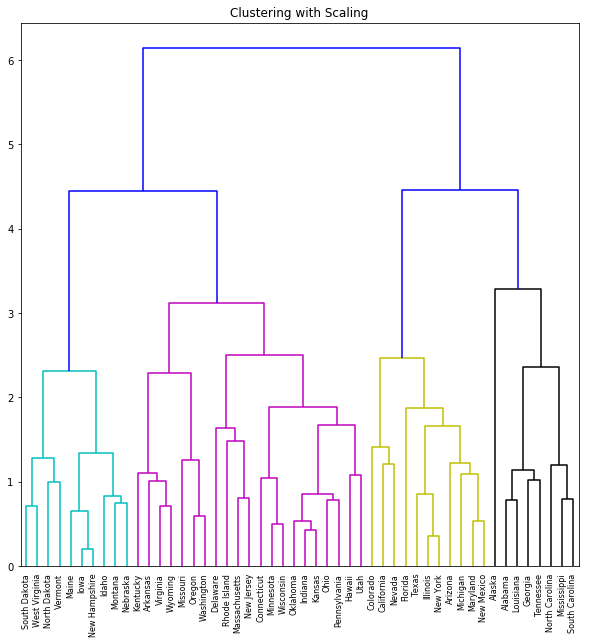

In [18]:
scaled_array = StandardScaler().fit_transform(df2)
scaled_df = pd.DataFrame(scaled_array, index = df2.index, columns= df2.columns)
cluster = hr.linkage(scaled_df, method='complete', metric='euclidean')

%matplotlib inline
plt.figure(figsize=(10,10))
hr.dendrogram(cluster, labels=scaled_df.index)
plt.title('Clustering with Scaling')
plt.show()

Scaling the results is important because the data have different units (e.g. UrbanPop is in percent, while the others are per 100,000). Thus, scaling changes the structure of the tree slightly, and changes the groups as well (e.g. Texas is no longer in the same cluster with Florida). Scaling the results is important for this analysis.